<a href="https://colab.research.google.com/github/JAIRIYAZ/HTML/blob/main/handwritten%20digit%20recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install tensorflow numpy matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=0.2)


Epoch 1/10
240/240 [==============================] - 39s 159ms/step - loss: 0.2969 - accuracy: 0.9153 - val_loss: 0.0936 - val_accuracy: 0.9732
Epoch 2/10
240/240 [==============================] - 38s 157ms/step - loss: 0.0723 - accuracy: 0.9781 - val_loss: 0.0605 - val_accuracy: 0.9816
Epoch 3/10
240/240 [==============================] - 36s 150ms/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0520 - val_accuracy: 0.9858
Epoch 4/10
240/240 [==============================] - 38s 156ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0463 - val_accuracy: 0.9863
Epoch 5/10
240/240 [==============================] - 37s 156ms/step - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.0408 - val_accuracy: 0.9879
Epoch 6/10
240/240 [==============================] - 39s 161ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0398 - val_accuracy: 0.9888
Epoch 7/10
240/240 [==============================] - 36s 151ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0380 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 4s 13ms/step - loss: 0.0278 - accuracy: 0.9910
Test accuracy: 0.9909999966621399


313/313 [==============================] - 6s 17ms/step


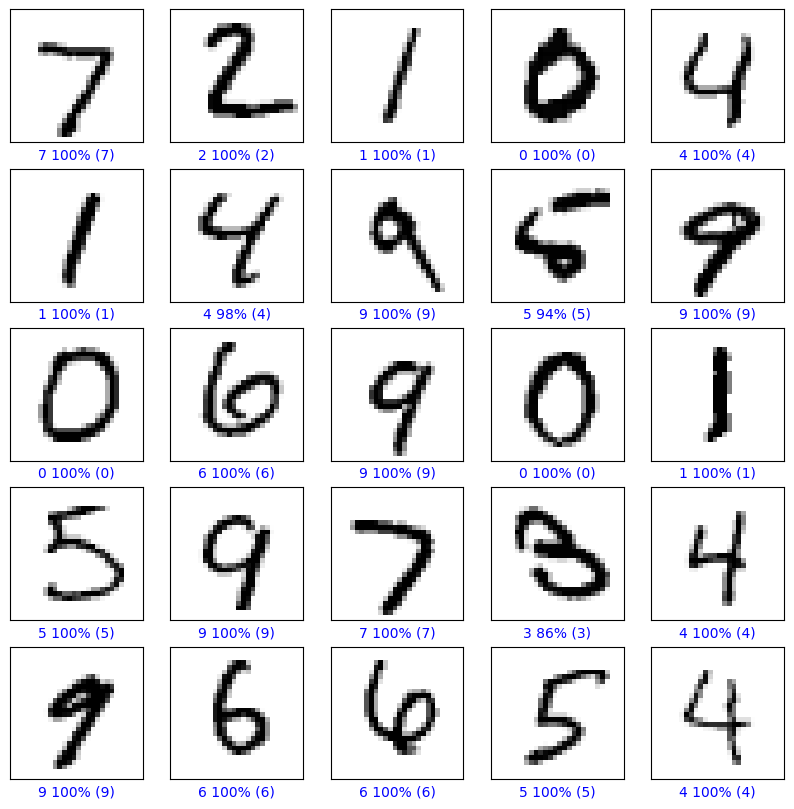

In [ ]:
predictions = model.predict(x_test)

# Display some predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                        100*np.max(predictions_array),
                                        true_label),
                                        color=color)

num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, y_test, x_test)
plt.show()


In [ ]:
model.save('mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('mnist_cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

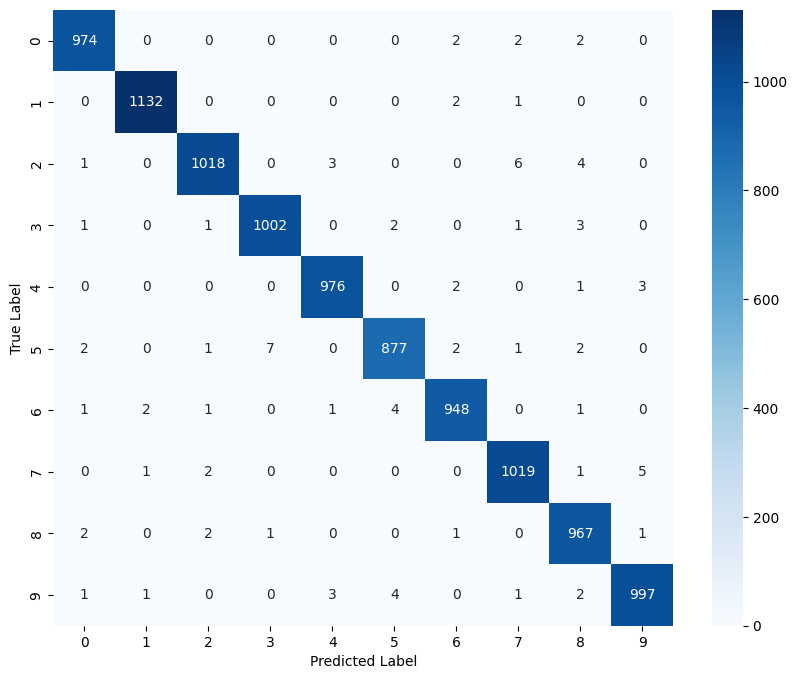

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


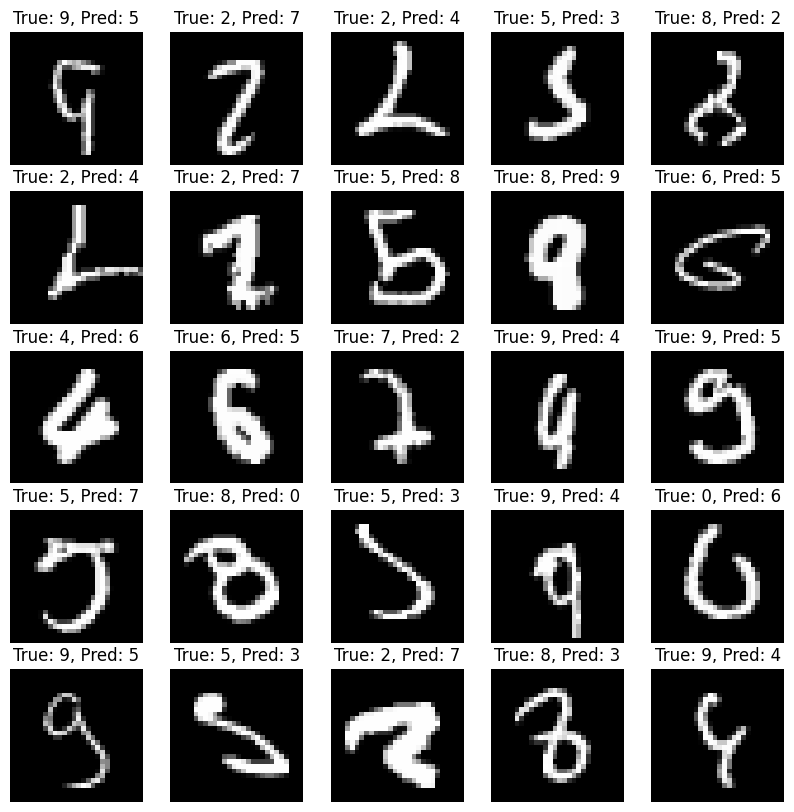

In [ ]:
misclassified = np.where(y_pred != y_test)[0]

plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train)


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
